<a href="https://colab.research.google.com/github/vinayakghatul/Walmart-CLT/blob/main/Case_study_walmart_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('walmart.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Marital_Status'].unique()

array([0, 1])

In [ ]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df['Purchase'].min()

12

In [ ]:
df['Purchase'].max()

23961

In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df2 = df

In [ ]:
df2 = df2.drop(['User_ID','Product_ID'],axis=1)

In [ ]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [ ]:
df2.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Initial observations
* Dataset does not contain any null values
* Int and object dtypes present
* Age is in age group bins, purchase amount has wide range with min as 12 and max as 23961.

In [ ]:
columns=['Occupation', 'Marital_Status', 'Product_Category']
df2[columns]=df[columns].astype('object')

In [ ]:
df2.describe(include='all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,2,7,21.0,3,5,2.0,20.0,NaN
top,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [ ]:
df2.dtypes

Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

#### Observations from description of data
* a
* b
* c

In [ ]:
# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
((df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df2))*100).round(2)

value
variable                   value       
Age                        0-17    2.75
                           18-25  18.12
                           26-35  39.92
                           36-45  20.00
                           46-50   8.31
                           51-55   7.00
                           55+     3.91
City_Category              A      26.85
                           B      42.03
                           C      31.12
Gender                     F      24.69
                           M      75.31
Marital_Status             0      59.03
                           1      40.97
Stay_In_Current_City_Years 0      13.53
                           1      35.24
                           2      18.51
                           3      17.32
                           4+     15.40

#### Observations:
* 39.92% customers belong 26-35 age group bin
* Male customers are much higher - 75% than female customers - i.e. 25%
* Unmarried to married ration is 3:2

#### Bi-variate analysis

In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['Age'].unique()
(df3.value_counts()/len(df3)).round(2)

Age
[26-35]    0.35
[36-45]    0.20
[18-25]    0.18
[46-50]    0.09
[51-55]    0.08
[55+]      0.06
[0-17]     0.04
Name: count, dtype: float64

In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['Age'].unique()
(df3.value_counts()/len(df3)).round(2)

Age
[26-35]    0.35
[36-45]    0.20
[18-25]    0.18
[46-50]    0.09
[51-55]    0.08
[55+]      0.06
[0-17]     0.04
Name: count, dtype: float64

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['Gender'].unique()
(df3.value_counts()/len(df3)).round(2)

Gender
[M]    0.72
[F]    0.28
Name: count, dtype: float64

In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['City_Category'].unique()
(df3.value_counts()/len(df3)).round(2)

City_Category
[C]    0.53
[B]    0.29
[A]    0.18
Name: count, dtype: float64

In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['Stay_In_Current_City_Years'].unique()
(df3.value_counts()/len(df3)).round(2)

Stay_In_Current_City_Years
[1]     0.35
[2]     0.19
[3]     0.17
[4+]    0.15
[0]     0.13
Name: count, dtype: float64

In [ ]:
#Checking how the data is spread basis distinct users

df3=df.groupby(['User_ID'])['Marital_Status'].unique()
(df3.value_counts()/len(df3)).round(2)

Marital_Status
[0]    0.58
[1]    0.42
Name: count, dtype: float64

In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df4=pd.DataFrame(df.groupby(['Gender'])[['Purchase']].sum())

df4['percent'] = (df4['Purchase'] /
                  df4['Purchase'].sum()) * 100
df4.round(2)

,Purchase,percent
Gender,,
F,1186232642,23.28
M,3909580100,76.72


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df4=pd.DataFrame(df.groupby(['Age'])[['Purchase']].sum())

df4['percent'] = (df4['Purchase'] /
                  df4['Purchase'].sum()) * 100
df4.round(2)

,Purchase,percent
Age,,
0-17,134913183,2.65
18-25,913848675,17.93
26-35,2031770578,39.87
36-45,1026569884,20.15
46-50,420843403,8.26
51-55,367099644,7.20
55+,200767375,3.94


In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df4=pd.DataFrame(df.groupby(['Marital_Status'])[['Purchase']].sum())

df4['percent'] = (df4['Purchase'] /
                  df4['Purchase'].sum()) * 100
df4.round(2)

,Purchase,percent
Marital_Status,,
0,3008927447,59.05
1,2086885295,40.95


In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df4=pd.DataFrame(df.groupby(['Occupation'])[['Purchase']].sum())

df4['percent'] = (df4['Purchase'] /
                  df4['Purchase'].sum()) * 100
df4.round(2)

,Purchase,percent
Occupation,,
0,635406958,12.47
1,424614144,8.33
2,238028583,4.67
3,162002168,3.18
4,666244484,13.07
5,113649759,2.23
6,188416784,3.70
7,557371587,10.94
8,14737388,0.29


In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df4=pd.DataFrame(df.groupby(['Product_Category'])[['Purchase']].sum())

df4['percent'] = (df4['Purchase'] /
                  df4['Purchase'].sum()) * 100
df4.round(2)

,Purchase,percent
Product_Category,,
1,1910013754,37.48
2,268516186,5.27
3,204084713,4.00
4,27380488,0.54
5,941835229,18.48
6,324150302,6.36
7,60896731,1.20
8,854318799,16.77
9,6370324,0.13


#### Observations
* Product category - 1 has highest purchase percentage.
* Unmarried customers contribute to almost 60% of total purchase
* Age group in bin 26-35 contribute highest towards total purchase with 39.8%
* Customers with occupation ID 0,4 and 7 contribute most in total purchase.

### Univariate Analysis

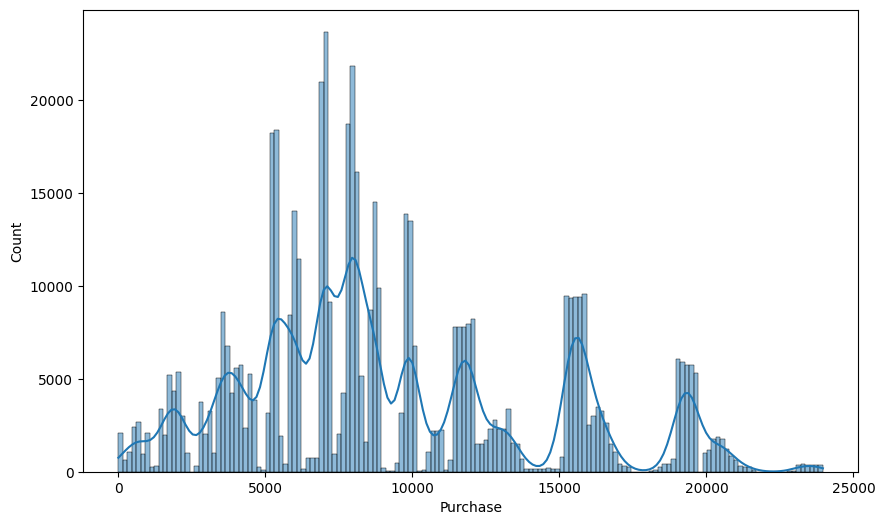

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Purchase',kde=True)
plt.show()

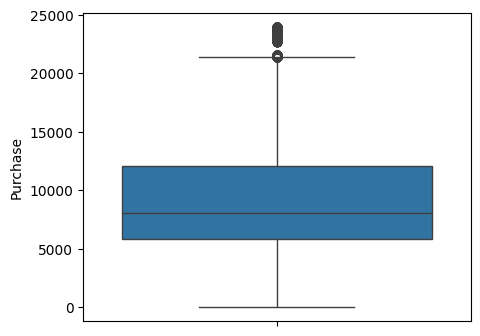

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df,y='Purchase')
plt.show()

#### Observations
* Purchase amount frequency is highest betweeen 5000-10000

#### Categorical variables analysis


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


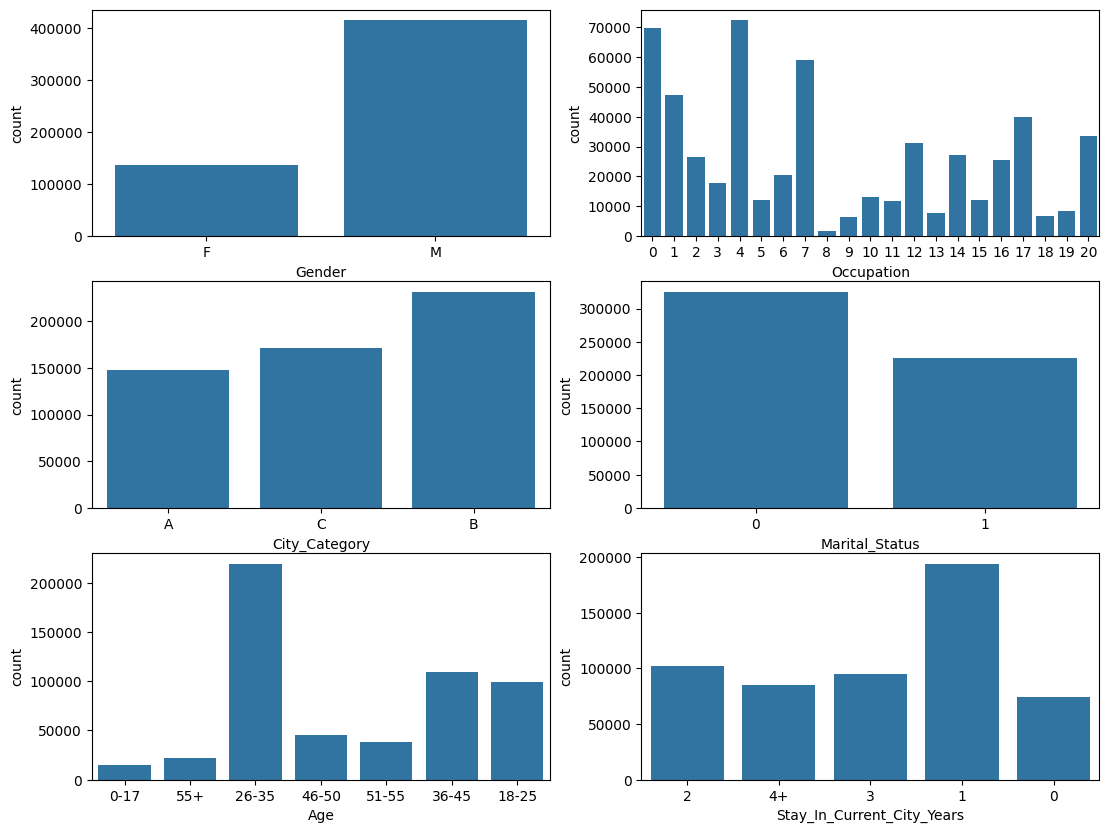

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
sns.countplot(data=df, x='Age',ax=axs[2,0])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axs[2,1])
plt.show()

#### Observations from plots
* Male purchas is higher than Female
* Customers with occupation 0,4 and 7 contribute more in total purchase
* Customers residing in city B have puchased more compared to other two cities
* Unmarried customers tend to purchase more than married ones.
* Age bin 26-35 tend to spend more compared to other age groups
* People staying for more than 1 year and less than 2 year tend to spend more compared to others.

### Bi-variate Analysis

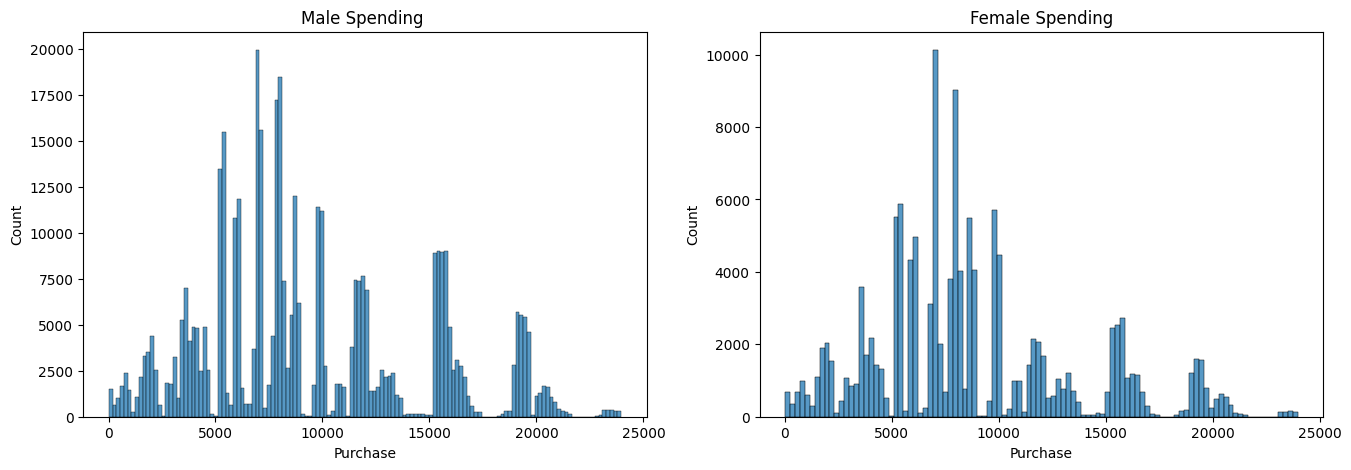

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

In [ ]:
categ_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [ ]:
categ_cols.append('Occupation')
categ_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Occupation']

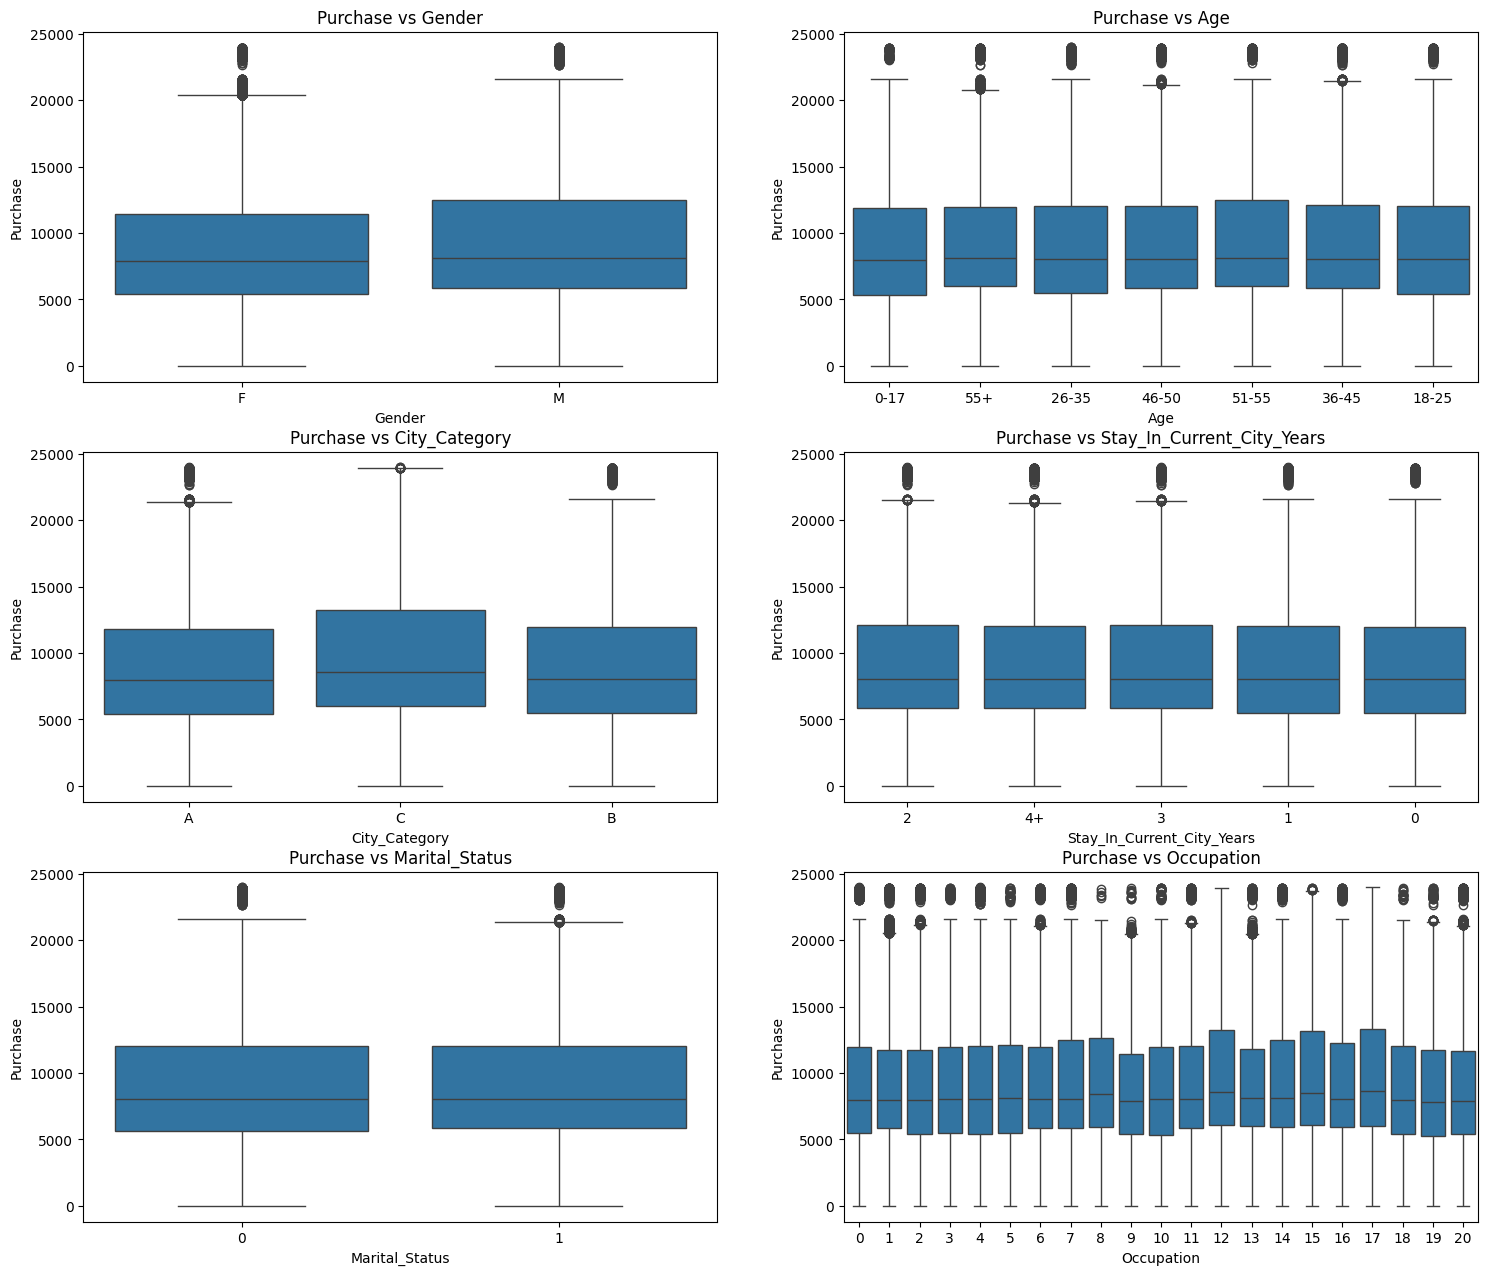

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=categ_cols[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {categ_cols[count]}")
        count += 1
plt.show()

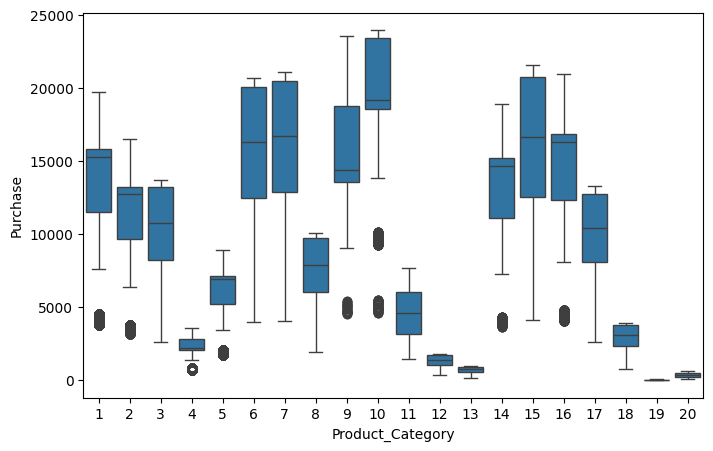

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.show()

#### Multi-Variate Analysis

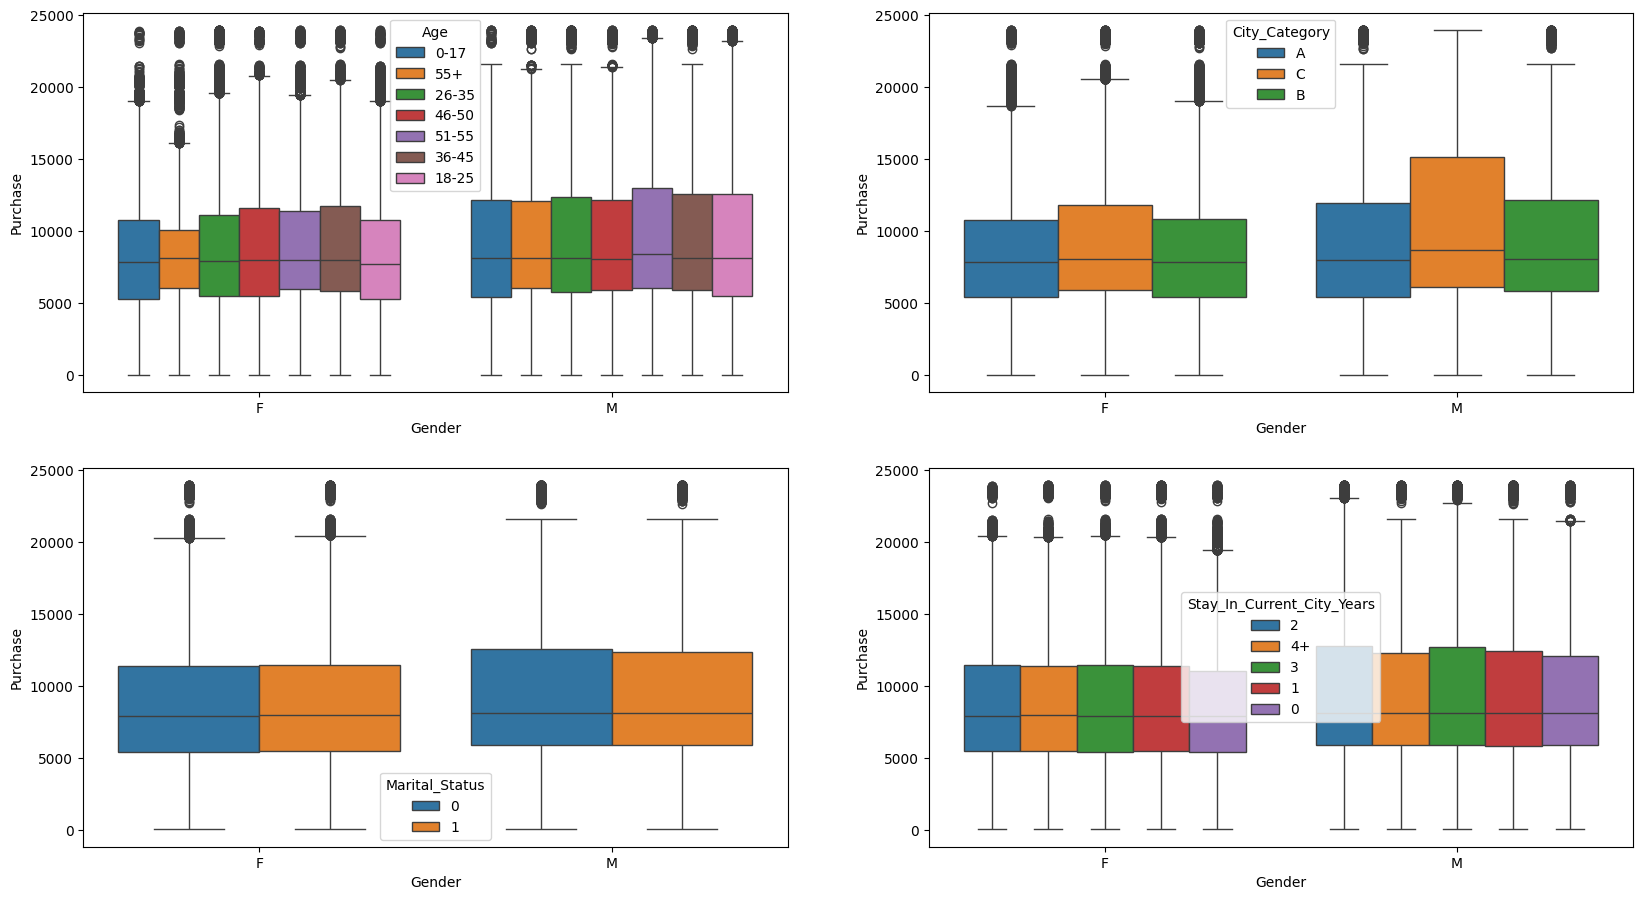

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_new = df[['User_ID','Occupation','Marital_Status','Product_Category','Purchase']]
df_new.head()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,1000001,10,0,3,8370
1,1000001,10,0,1,15200
2,1000001,10,0,12,1422
3,1000001,10,0,12,1057
4,1000002,16,0,8,7969


In [ ]:
df_new.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<Axes: >

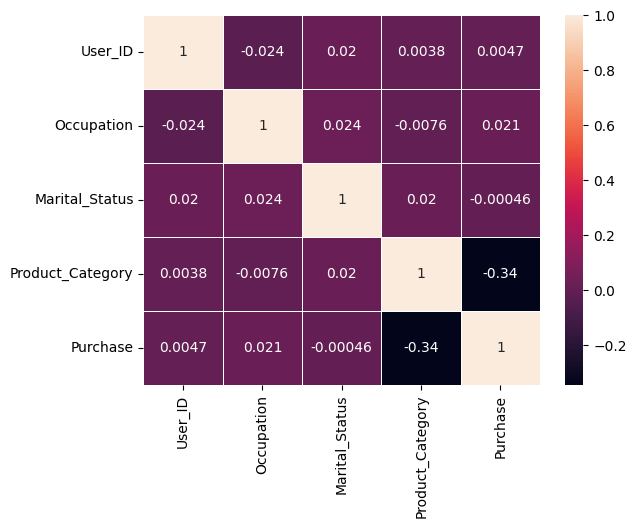

In [ ]:
sns.heatmap(df_new.corr(), annot=True, linewidth=.5)

#### Observations
* a
* b
* c

### CLT

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_gender = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
df_gender

,,Purchase
User_ID,Gender,
1000001,F,334093
1000002,M,810472
1000003,M,341635
1000004,M,206468
1000005,M,821001
...,...,...
1006036,F,4116058
1006037,F,1119538
1006038,F,90034


In [ ]:
df_gender = df_gender.reset_index()

In [ ]:
df_gender['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

Text(0.5, 1.0, 'Male avg spend')

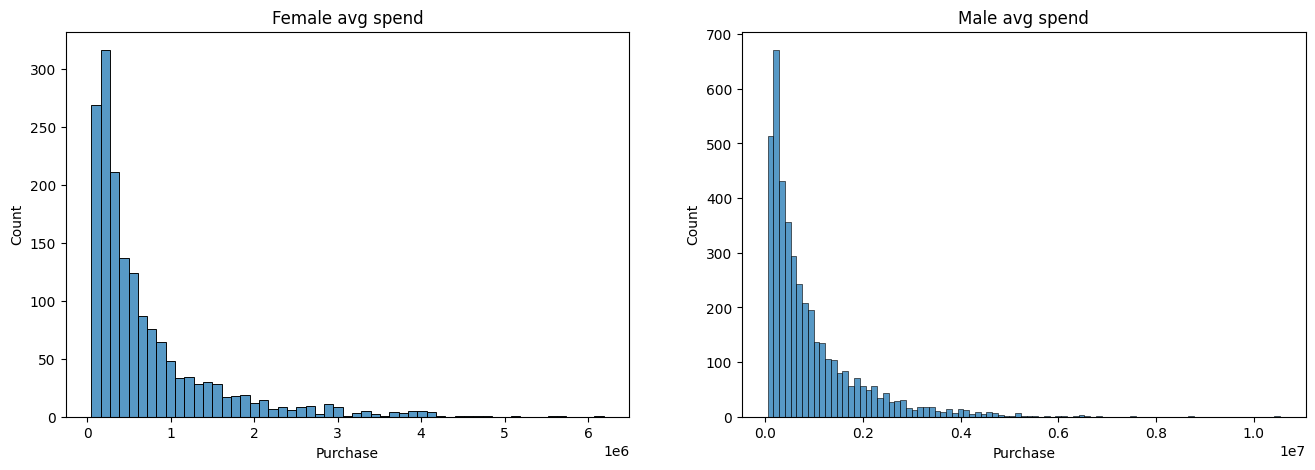

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=2,figsize=(16,5))

sns.histplot(data=df_gender[df_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Female avg spend")
sns.histplot(data=df_gender[df_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Male avg spend")

#### Observations
* Avg spend by male customers is much higher than femal customers

In [ ]:
df_gender.groupby(['Gender'])['Purchase'].mean().round(2)

Gender
F    712024.39
M    925344.40
Name: Purchase, dtype: float64

* Mean of purchase amount for Male gender is higher than Female.

In [ ]:
df_gender.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

* Total purchase by Male customers is almost 3.6 times Female customers

In [ ]:
df_male = df_gender[df_gender['Gender']=='M']
df_female = df_gender[df_gender['Gender']=='F']

In [ ]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = df_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = df_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

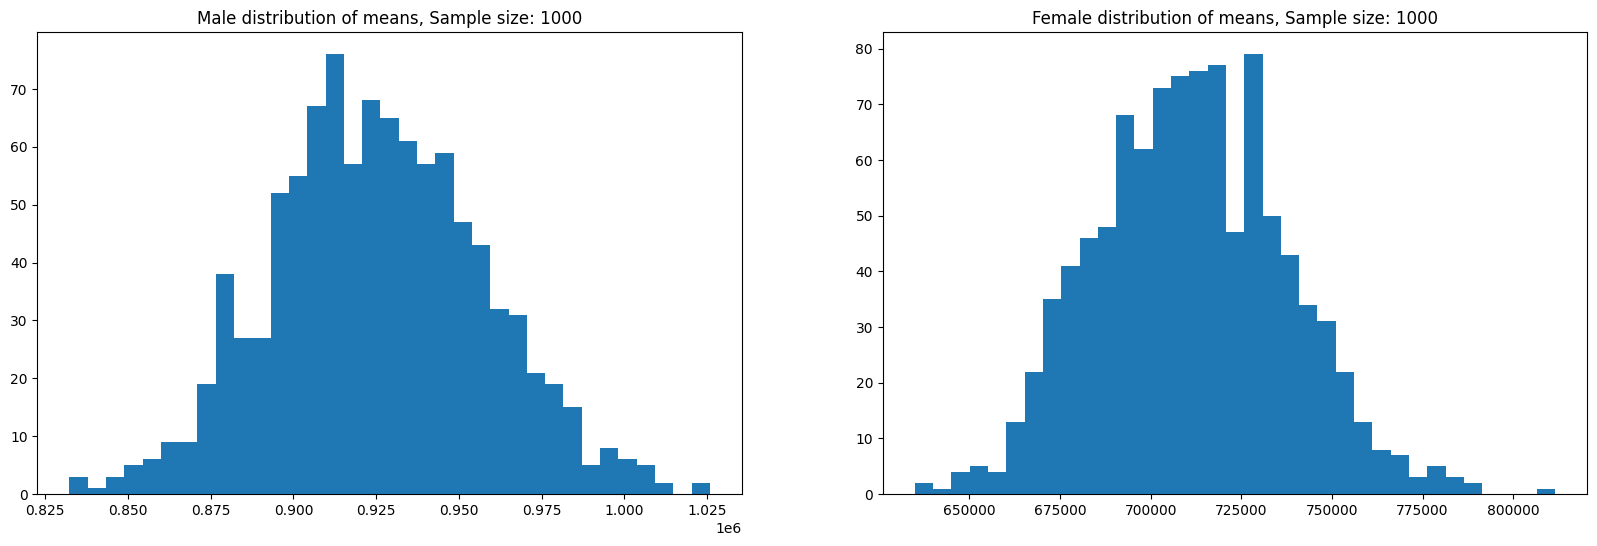

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

#### Calculating 90% confidence interval for sample size 1000:

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval


sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male/np.sqrt(1000)
sample_std_error_female = sample_std_female/np.sqrt(1000)

print("Population avg spend amount for Male: {:.2f}".format(df_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(df_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(sample_mean_male))
print("Sample avg spend amount for Female: {:.2f}\n".format(sample_mean_female))

print("Sample std for Male: {:.2f}".format(sample_std_male))
print("Sample std for Female: {:.2f}\n".format(sample_std_female))

print("Sample std error for Male: {:.2f}".format(sample_std_error_male))
print("Sample std error for Female: {:.2f}\n".format(sample_std_error_female))


Upper_Limit_male = sample_mean_male + z90*sample_std_error_male
Lower_Limit_male = sample_mean_male - z90*sample_std_error_male

Upper_Limit_female = sample_mean_female + z90*sample_std_error_female
Lower_Limit_female = sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925464.86
Sample avg spend amount for Female: 711127.30

Sample std for Male: 32034.41
Sample std for Female: 26117.31

Sample std error for Male: 1013.02
Sample std error for Female: 825.90

Male_CI:  [923798.4516203962, 927131.277917604]
Female_CI:  [709768.6911200575, 712485.9081479424]


#### Observation:

Now using the Confidence interval at 90%, we can say that:

Average amount spend by male customers lie in the range 923155.49 - 926403.45

Average amount spend by female customers lie in range 710071.81 - 712692.72

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval


sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male/np.sqrt(1000)
sample_std_error_female = sample_std_female/np.sqrt(1000)

print("Population avg spend amount for Male: {:.2f}".format(df_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(df_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(sample_mean_male))
print("Sample avg spend amount for Female: {:.2f}\n".format(sample_mean_female))

print("Sample std for Male: {:.2f}".format(sample_std_male))
print("Sample std for Female: {:.2f}\n".format(sample_std_female))

print("Sample std error for Male: {:.2f}".format(sample_std_error_male))
print("Sample std error for Female: {:.2f}\n".format(sample_std_error_female))


Upper_Limit_male = sample_mean_male + z95*sample_std_error_male
Lower_Limit_male = sample_mean_male - z95*sample_std_error_male

Upper_Limit_female = sample_mean_female + z95*sample_std_error_female
Lower_Limit_female = sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925464.86
Sample avg spend amount for Female: 711127.30

Sample std for Male: 32034.41
Sample std for Female: 26117.31

Sample std error for Male: 1013.02
Sample std error for Female: 825.90

Male_CI:  [923479.3512302381, 927450.3783077621]
Female_CI:  [709508.5320429195, 712746.0672250803]


#### Observation:
Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range 922844.52 - 926714.42

Average amount spend by female customers lie in range 709820.87 - 712943.66

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval


sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male/np.sqrt(1000)
sample_std_error_female = sample_std_female/np.sqrt(1000)

print("Population avg spend amount for Male: {:.2f}".format(df_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(df_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(sample_mean_male))
print("Sample avg spend amount for Female: {:.2f}\n".format(sample_mean_female))

print("Sample std for Male: {:.2f}".format(sample_std_male))
print("Sample std for Female: {:.2f}\n".format(sample_std_female))

print("Sample std error for Male: {:.2f}".format(sample_std_error_male))
print("Sample std error for Female: {:.2f}\n".format(sample_std_error_female))


Upper_Limit_male = sample_mean_male + z99*sample_std_error_male
Lower_Limit_male = sample_mean_male - z99*sample_std_error_male

Upper_Limit_female = sample_mean_female + z99*sample_std_error_female
Lower_Limit_female = sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925464.86
Sample avg spend amount for Female: 711127.30

Sample std for Male: 32034.41
Sample std for Female: 26117.31

Sample std error for Male: 1013.02
Sample std error for Female: 825.90

Male_CI:  [922855.3326894843, 928074.3968485158]
Female_CI:  [708999.7765142943, 713254.8227537055]


#### Observation:
Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range 922236.39 - 927322.55

Average amount spend by female customers lie in range 709330.15 - 713434.38

In [ ]:
df_age = df.groupby(['User_ID','Age'])[['Purchase']].sum()
df_age = df_age.reset_index()
df_age.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [ ]:
df_age['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

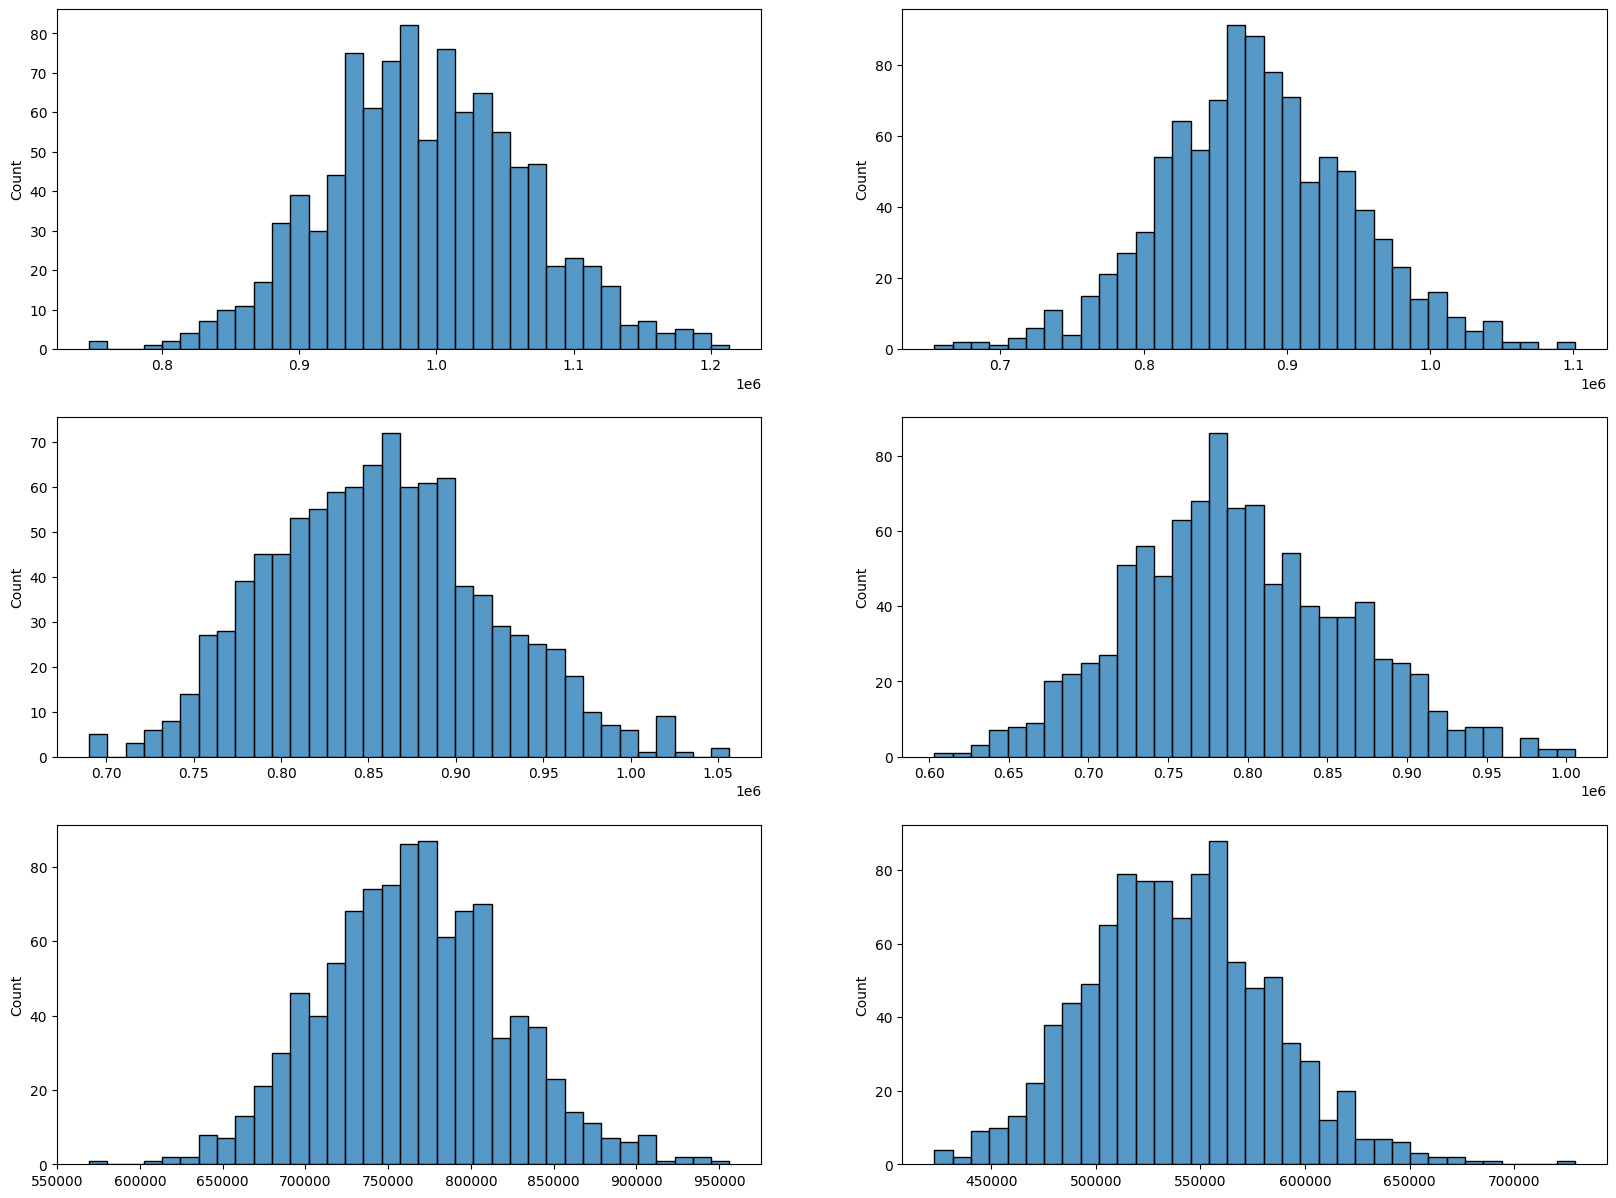

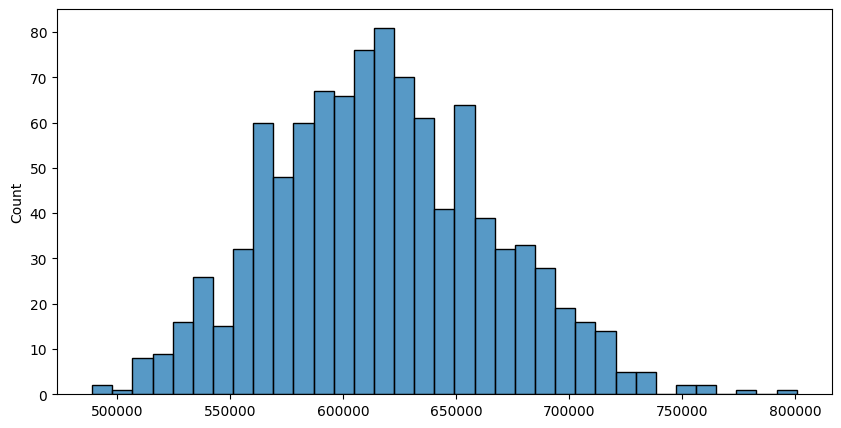

In [ ]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = df_age[df_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()



#### Observations:

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

#### Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:

In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = df_age[df_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = df_age[df_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = df_age[df_age['Age']==val]

    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = df_age[df_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = df_age[df_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = df_age[df_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [ ]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = df_age[df_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):

        mean = df_age[df_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = df_age[df_age['Age']==val]

    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


### Recommendations:

    1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.
    
    2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.
    
    3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
    
    4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.
    
    5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.
    
    6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
    
    7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.
    
    8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.
    
    9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.
    
    10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
    
    11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
    
    12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

### Question:

    1.Are women spending more money per transaction than men? Why or Why not?
    
    Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).
    
    The reason for less purchase by women could have several factors:

      Males might be doing the purchase for females.
      Salary can be a factor in less purchase.
      We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
      If the female based products quality/quantity needs to be improved for women purchasing.
    
    2. Confidence intervals and distribution of the mean of the expenses by female and male customers.
    
    At 99% Confidence Interval with sample size 1000
    
    Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61

    Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31
    
    
    3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
    
    Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.
    
    4. Results when the same activity is performed for Married vs Unmarried
    
    At 99% Confidence Interval with sample size 1000
    
    Average amount spend by married customers lie in the range:  [841059.6309378392, 845078.140167503]
    Average amount spend by unmarried customers lie in the range:  [879093.3492016713, 884078.6782803286]
    
    5. Results when the same activity is performed for Age
    
    At 99% Confidence Interval with sample size 200
    
    For age 26-35 confidence interval of means: (931009.46,1048309.18)
    For age 36-45 confidence interval of means: (805647.89, 953683.53)
    For age 18-25 confidence interval of means: (784903.24, 924823.00)
    For age 46-50 confidence interval of means: (688663.50, 896434.06)
    For age 51-55 confidence interval of means: (670138.33, 856263.52)
    For age 55+ confidence interval of means: (457227.15, 622167.34)
    For age 0-17 confidence interval of means: (498997.92, 738737.71)

    